# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [305]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
# import library untuk clustering dari SK learn
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [307]:
!pip install kaggle

In [308]:
import kagglehub

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

**Insight** :
- Dataset yang digunakan adalah data penjualan barang secara live pada platform sosial media Facebook di Thailand
- Fitur-fitur yang ada seperti tipe postingan, jumlah reactions, comments, like, dan lain-lain

In [309]:
# Donwload dataset dari kaggle
!kaggle datasets download ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo

Dataset URL: https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo
License(s): unknown
facebook-live-sellers-in-thailand-uci-ml-repo.zip: Skipping, found more recently modified local copy (use --force to force download)


In [310]:
# Unzip dataset yang telah didownload
!unzip /content/facebook-live-sellers-in-thailand-uci-ml-repo.zip

Archive:  /content/facebook-live-sellers-in-thailand-uci-ml-repo.zip
replace Live.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Live.csv                


In [311]:
# buat dataframe dengan index kolomnya adalah provinsi
df = pd.read_csv('/content/Live.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [312]:
# Jumlah baris dan kolom
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [313]:
# Jenis data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [314]:
# Statistik Dataset
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


**Insight**:
Dari data di atas dapat diliaht bahwa ada 4 kolom terakhir yang tidak memiliki nilai sama sekali, sehingga akan dihapus nanti

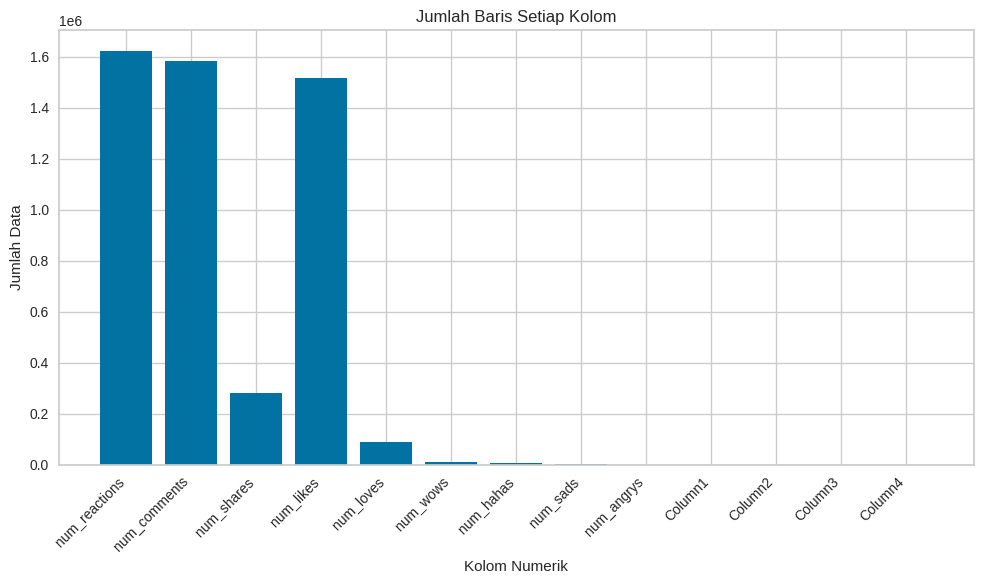

In [315]:
# Diagram batang untuk kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns
column_sums = df[numerical_cols].sum()
plt.figure(figsize=(10, 6))
plt.bar(column_sums.index, column_sums.values)
plt.xlabel("Kolom Numerik")
plt.ylabel("Jumlah Data")
plt.title("Jumlah Baris Setiap Kolom")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Insight**:
Dari grafik diagram batang di atas, dapat dilihat bahwa ada beberapa kolom atau fitur yang memiliki baris sangat sedikit bahkan tidak memiliki sama sekali, hal ini akan menjadi pertimbangan dalam pemilihan fitur untuk proses clustering nantinya.

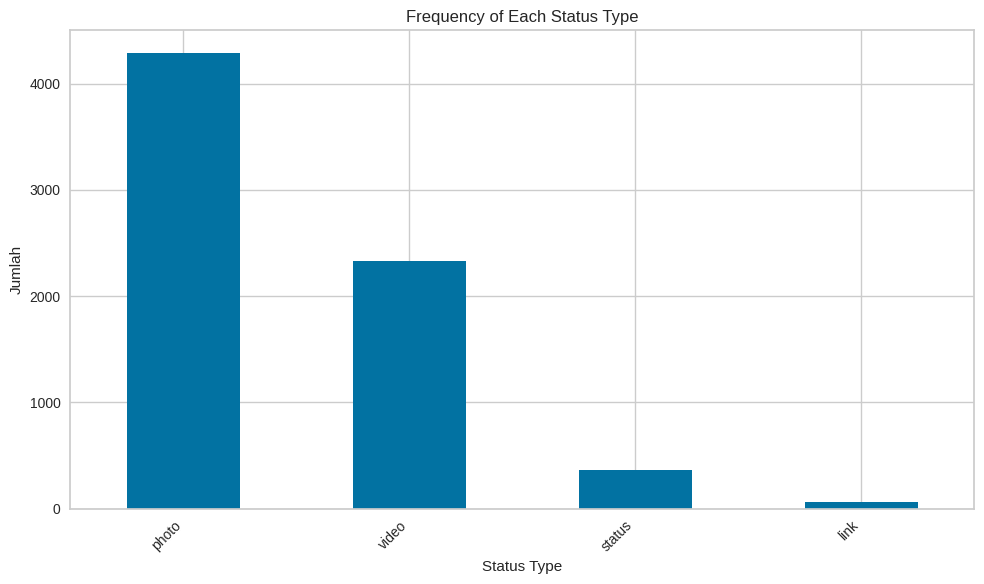

In [316]:
# Diagram batang untuk kolom status_type
plt.figure(figsize=(10, 6))
df['status_type'].value_counts().plot(kind='bar')
plt.xlabel("Status Type")
plt.ylabel("Jumlah")
plt.title("Frequency of Each Status Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight**:
Dari grafik diagram batang di atas, dapat dilihat bahwa konten live selling paling banyak berjenis photo dengan jumlah 400-an konten, disusul video, status, dan link.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Cek Missing Value

In [317]:
# Cek apakah ada missingg value
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [318]:
# drop kolom yang punya missing value
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


## Cek Data Duplikat

In [319]:
# Cek data duplikat
df.duplicated().sum()

51

In [320]:
# Drop data duplikat
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [321]:
# Cek jumlah baris dan kolom
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

6999 rows x 12 columns


## Drop Kolom yang Tidak Digunakan

**Insight** : Kolom status_id dan status_published tidak dipakai karena tidak relevan dengan kolom lainnya.

In [322]:
# drop kolom yang punya missing value
df.drop(['status_id', 'status_published' ], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    6999 non-null   object
 1   num_reactions  6999 non-null   int64 
 2   num_comments   6999 non-null   int64 
 3   num_shares     6999 non-null   int64 
 4   num_likes      6999 non-null   int64 
 5   num_loves      6999 non-null   int64 
 6   num_wows       6999 non-null   int64 
 7   num_hahas      6999 non-null   int64 
 8   num_sads       6999 non-null   int64 
 9   num_angrys     6999 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 601.5+ KB


## Encoding Data Kategorikal

In [323]:
# cek data
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [324]:
# lakukan label encoding pada status_type
le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


**Insight** :
- Data kategorikal yang dibuah menjadi adata numerik (labeling) adalah status type. Setelah proses labeling, datanya menjadi 0 untuk link, 1 untuk photo,2 untuks status, dan 3 untuk video

## Heatmap Matriks Korelasi

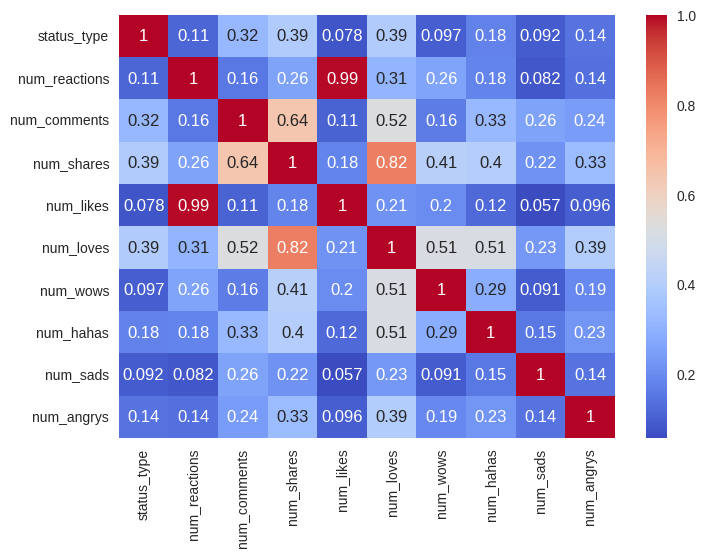

In [325]:
# eheatmap matriks korelasi dari scaled_df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Insight** :
- Fitur-fitur yang memiliki korelasi tinggi tidak akan dipakai untuk clustering, karena fitur-fitur tersebut memiliki pengaruh yang sama atau hampir identik
- Firut yang diambil adalah status_type (kategorikal), num_reactions, num_comments, num_shares, num_loves

## Pilih 5 fitur yang digunakan untuk clustering

In [326]:
# Mengambil 5 kolom dari dataset
final_df = df.iloc[:, [0, 1, 2, 3, 5]]
final_df.head()

,status_type,num_reactions,num_comments,num_shares,num_loves
0,3,529,512,262,92
1,1,150,0,0,0
2,3,227,236,57,21
3,1,111,0,0,0
4,1,213,0,0,9


## Lakukan Normalisasi Fitur Menggunakan MinMaxScaler

In [327]:
# minmaxscaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(final_df)
scaled_df = pd.DataFrame(scaled_df, columns=final_df.columns)
scaled_df.head()

,status_type,num_reactions,num_comments,num_shares,num_loves
0,1.000000,0.112314,0.024393,0.076519,0.140030
1,0.333333,0.031847,0.000000,0.000000,0.000000
2,1.000000,0.048195,0.011243,0.016647,0.031963
3,0.333333,0.023567,0.000000,0.000000,0.000000
4,0.333333,0.045223,0.000000,0.000000,0.013699


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### Menentukan nilai K untuk K-means Clustering

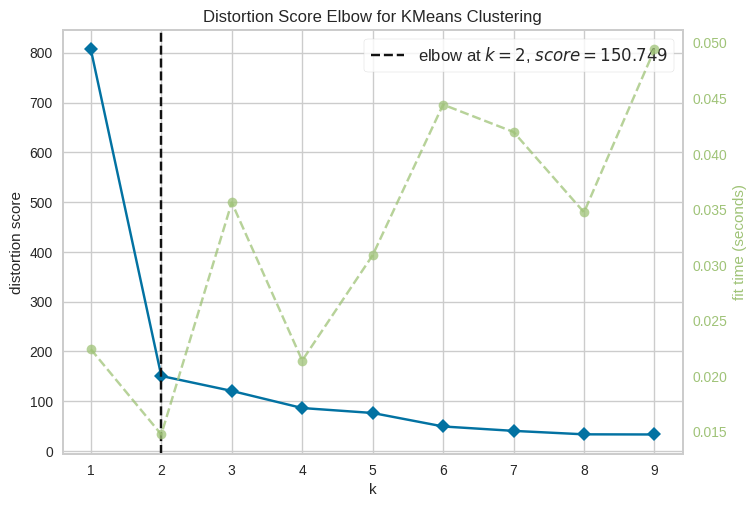

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [328]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(scaled_df)
visualizer.show()

### Clustering dengan K-Means Clustering

In [329]:
# KMeans dengan K=3
kmeans = KMeans(n_clusters=2, random_state=42).fit(scaled_df)
print("Proses Clustering Selesai")

Proses Clustering Selesai


In [330]:
# Hasil clustering
labels = kmeans.labels_
clustered_df = pd.DataFrame(scaled_df, columns=['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_loves'])
clustered_df['cluster'] = labels
clustered_df

,status_type,num_reactions,num_comments,num_shares,num_loves,cluster
0,1.000000,0.112314,0.024393,0.076519,0.140030,1
1,0.333333,0.031847,0.000000,0.000000,0.000000,0
2,1.000000,0.048195,0.011243,0.016647,0.031963,1
3,0.333333,0.023567,0.000000,0.000000,0.000000,0
4,0.333333,0.045223,0.000000,0.000000,0.013699,0
...,...,...,...,...,...,...
6994,0.333333,0.018896,0.000000,0.000000,0.000000,0
6995,0.333333,0.003397,0.000000,0.000000,0.001522,0
6996,0.333333,0.000425,0.000000,0.000000,0.001522,0
6997,0.333333,0.074522,0.000572,0.006425,0.003044,0


### Mengembalikan Nilai Data ke Nilai Asli

In [331]:
# Kembalikan data ke nilai asli (kecuali kolom cluster)
inverse_data = scaler.inverse_transform(clustered_df.drop('cluster', axis=1))
inverse_df = pd.DataFrame(inverse_data, columns=['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_loves'])
inverse_df['cluster'] = labels
inverse_df.head()

,status_type,num_reactions,num_comments,num_shares,num_loves,cluster
0,3.0,529.0,512.0,262.0,92.0,1
1,1.0,150.0,0.0,0.0,0.0,0
2,3.0,227.0,236.0,57.0,21.0,1
3,1.0,111.0,0.0,0.0,0.0,0
4,1.0,213.0,0.0,0.0,9.0,0


In [332]:
# Mapping kolom status type ke data asli
status_mapping = {
    0: 'link',
    1: 'photo',
    2: 'status',
    3: 'video'
}
# Map numerical data to categorical
original_df = pd.DataFrame(inverse_df, columns=['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_loves' ,'cluster'])
original_df['status_type'] = original_df['status_type'].replace(status_mapping)
original_df.head()

,status_type,num_reactions,num_comments,num_shares,num_loves,cluster
0,video,529.0,512.0,262.0,92.0,1
1,photo,150.0,0.0,0.0,0.0,0
2,video,227.0,236.0,57.0,21.0,1
3,photo,111.0,0.0,0.0,0.0,0
4,photo,213.0,0.0,0.0,9.0,0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [333]:
# Hitung Silhouette Score
silhouette_avg = silhouette_score(scaled_df, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.8007


## **c. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

### **Visualisasi dengan 2D PCA projection**

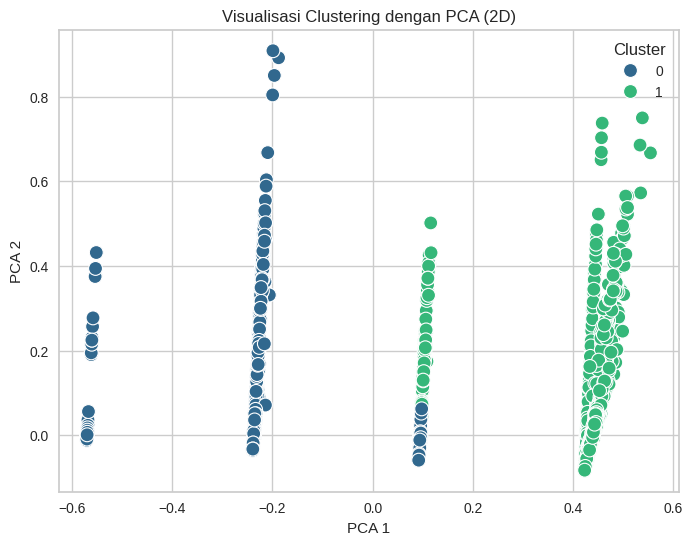

In [334]:
# Pisahkan fitur dan label
X = clustered_df.drop('cluster', axis=1)  # Fitur
y = clustered_df['cluster']  # Label cluster

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=100)
plt.title('Visualisasi Clustering dengan PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

## **d. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [335]:
# Jumlah data tiap cluster
cluster_counts = clustered_df['cluster'].value_counts()
print(f"Jumlah data di cluster 0: {cluster_counts.get(0, 0)}")
print(f"Jumlah data di cluster 1: {cluster_counts.get(1, 0)}")

Jumlah data di cluster 0: 4574
Jumlah data di cluster 1: 2425


### **Visualisasi dengan Pairplot**

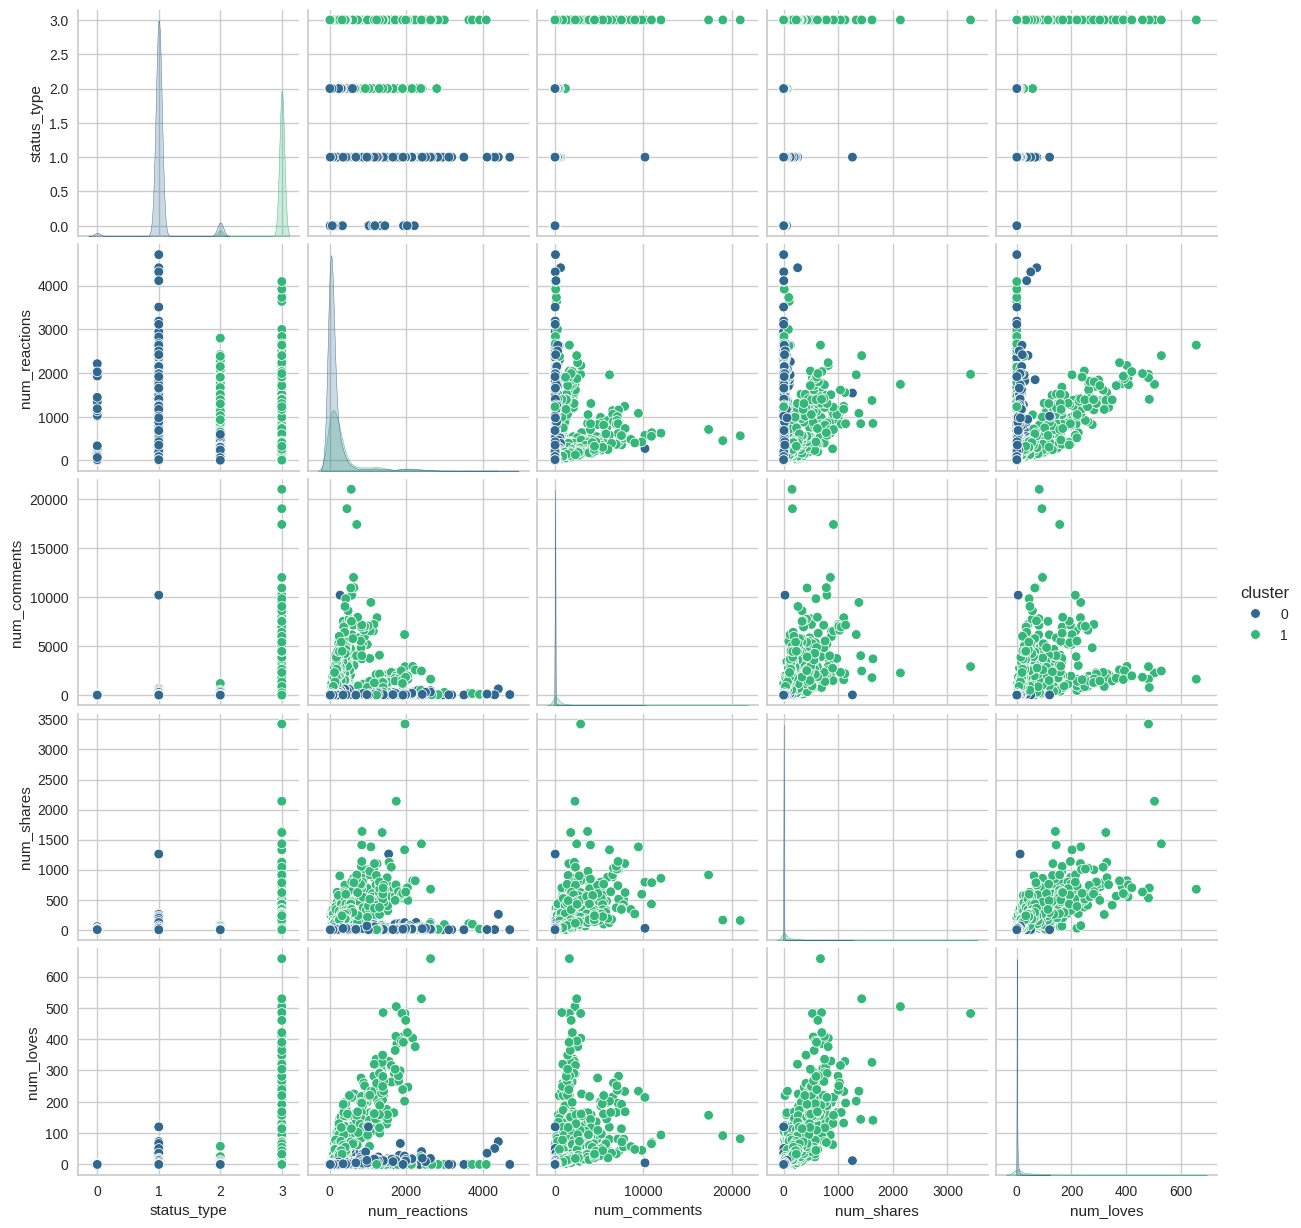

In [336]:
# Tampilan visualisasi menggunakan pair plot menghasilkan kombinasi antar kolom yang digunakan
sns.pairplot(inverse_df, hue='cluster', diag_kind='kde', palette='viridis')
plt.show()

**hasil interpretasinya di sini.**
1. Cluster 0:
- Terdapat 4574 data yang berada pada cluster 0
- Dari hasil visualisasi menggunakan PCA, sebaran pada cluster 0 lebih banyak pada PCA1 bernilai negatif. Sedangkan pada PCA 2 sebarannya mirip.
- Pada visualisasi menggunakan pairplot untuk kolom status_type, cluster 0 yang kebanyakan bertipe link, photo, dan status memiliki jumlah komentar, shares, dan loves yang sedikit, tetapi jumlah reaction cukup banyak.
- Pada kolom num_reactions untuk cluster 0, penambahan jumlah reactions tidak diikuti oleh penambahkan loves, shares, dan comments. Hal ini mengindikasikan bahwa konten tersebut tersampaikan ke pengguna tetapi tidak menarik minat pengguna melakukan aksi lainnya.
- Pada kolom num_comments, cluster 0 cenderung memiliki jumlah yang sedikit walaupun jumlah reactionnya tinggi.
- cluster 0 memiliki jumlah num_shares dan num_loves yang sedikit meskipun jumlah reactionnya cukup banyak.
2. Cluster 1:
- Terdapat 2425 data yang berada pada cluster 1
- Dari hasil visualisasi menggunakan PCA, sebaran pada cluster 1 lebih banyak pada PCA1 bernilai positif. Sedangkan pada PCA 2 sebarannya mirip.
- Pada visualisasi menggunakan pairplot untuk kolom status_type, cluster 1 yang kebanyakan video memiliki jumlah komentar, shares, reaction, dan loves yang banyak.
- Pada kolom num_reactions untuk cluster 1, penambahan jumlah reactions  diikuti oleh penambahkan loves, shares, dan comments. Hal ini mengindikasikan bahwa konten tersebut menarik pengguna untuk melakukan aksi lainnya seperti membagikan atau mengomentasi konten.
- Pada kolom num_comments, cluster 1 memiliki jumlah komentar yang banyak diikuti dengan aksi lain seperti love atau shares.
- cluster 1 memiliki jumlah num_shares dan num_loves yang banyak selaras dengan jumlah reaction yang diperoleh.

Note : 0 : link, 1 : photo, 2 : status,  3 : video


**Kesimpulan**
1. Cluster 0:
- Jika dilihat dari sedikitnya jumlah loves, shares, dan comments, cluster 0 dapat dikatakan merupakan cluster yang berisi konten-konten yang kurang menarik bagi pengguna facebook live selling walaupun jumlah reaksinya banyak. Hal ini mengindikasikan konten yang disampaikan tidak mendorong pengguna untuk melakukan aksi lainnya. Konten yang kurang menarik ini berbentuk link, status, dan photo.
2. Cluster 1:
- Jika dilihat dari banyaknya jumlah reactions, loves, shares, dan comments, cluster 1 dapat dikatakan merupakan cluster yang berisi konten-konten yang menarik bagi pengguna facebook live selling. Hal ini mengindikasikan konten yang disampaikan mampu mendorong pengguna untuk melakukan aksi lainnya. Konten pada cluster 1 didominasi oleh konten dengan bentuk video.

Dari hal-hal yang telah disampaikan tersebut, dapat disimpulkan bahwa untuk meningkatkan penjualan melalui konten live selling facebook, kreator disarankan untuk membuat konten dengan bentuk video. Konten berbentuk video mampu meningkatkan jumlah loves, comments, dan share sehingga kesempatan menjangkau pembeli akan lebih luas serta dapat meingkatkan penjualan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [337]:
original_df.head()

,status_type,num_reactions,num_comments,num_shares,num_loves,cluster
0,video,529.0,512.0,262.0,92.0,1
1,photo,150.0,0.0,0.0,0.0,0
2,video,227.0,236.0,57.0,21.0,1
3,photo,111.0,0.0,0.0,0.0,0
4,photo,213.0,0.0,0.0,9.0,0


In [338]:
# simpan file new_df dengan nama clustering_df
original_df.to_csv('clustering_df.csv', index=False)

In [339]:
classification_df = pd.read_csv('/content/clustering_df.csv')
classification_df.head()

,status_type,num_reactions,num_comments,num_shares,num_loves,cluster
0,video,529.0,512.0,262.0,92.0,1
1,photo,150.0,0.0,0.0,0.0,0
2,video,227.0,236.0,57.0,21.0,1
3,photo,111.0,0.0,0.0,0.0,0
4,photo,213.0,0.0,0.0,9.0,0
